In [1]:
!pip install torchdiffeq

In [2]:
#https://qiita.com/windfall/items/72b303867b174875f1b3

In [5]:
import torch
from torchdiffeq import odeint

import matplotlib.pyplot as plt

In [10]:
def func(t, z):
    return t

z0 = torch.Tensor([0])
t = torch.linspace(0,2,101)
out = odeint(func, z0, t)

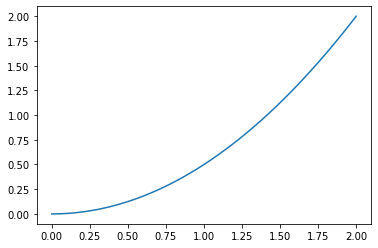

In [15]:
%matplotlib inline

plt.plot(t, out)
#plt.axes().set_aspect('equal', 'datalim')  # 縦横比を1:1にする
#plt.grid()
#plt.xlim(0,2)
#plt.show()


In [ ]:
class Oscillation:
    def __init__(self, km):  # km = k/m
        self.mat = torch.Tensor([[0, 1],
                                 [-km, 0]])

    def solve(self, t, x0, dx0):
        y0 = torch.cat([x0, dx0])
        out = odeint(self.func, y0, t)
        return out

    def func(self, t, y):
        # print(t)
        out = y @ self.mat  # @は行列積
        return out

if __name__=="__main__":
    x0 = torch.Tensor([1])
    dx0 = torch.Tensor([0])

    import numpy as np
    t = torch.linspace(0, 4 * np.pi, 1000)
    solver = Oscillation(1)
    out = solver.solve(t, x0, dx0)